<img src="./MIT_sloan_presentation/slide1.png" height="600" width="700" />

<img src="./MIT_sloan_presentation/slide2.png" height="600" width="700" />

<img src="./MIT_sloan_presentation/slide3.png" height="600" width="700" />

<img src="./MIT_sloan_presentation/slide4.png" height="600" width="700" />

<img src="./MIT_sloan_presentation/slide5.png" height="600" width="700" />

<img src="./MIT_sloan_presentation/slide6.png" height="600" width="700" />

<img src="./MIT_sloan_presentation/slide7.png" height="600" width="700" />

<img src="./MIT_sloan_presentation/slide8.png" height="600" width="700" />

<img src="./MIT_sloan_presentation/slide9.png" height="600" width="700" />

<img src="./MIT_sloan_presentation/slide10.png" height="600" width="700" />

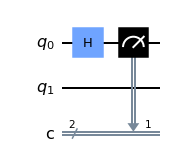

In [1]:
from qiskit import QuantumCircuit, Aer, execute
circ = QuantumCircuit(2,2)  #create QuantumCircuit object
circ.h(0)  #add Hadamard gate to circuit
circ.measure(0,1) #add a measurement to the circuit
circ.draw(output='mpl') #draw circuit

A very simple program with a simple gate. 1 quBit, 1 H[amadar] quantum gate

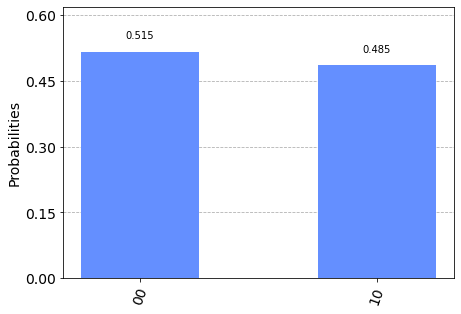

In [2]:
from Simulate_Plot import *
SimulatePlot(circ)

<img src="./MIT_sloan_presentation/slide11.png" height="600" width="700" />

<center><font size=8 color='#7d159e'><b>In-depth discussion of "Aloha, Quantum World!"</b> </font></center>


In [2]:
from python_funcs.demo_funcs import aloha_quantum_world
aloha_quantum_world()
aloha_quantum_world('quantum')
aloha_quantum_world('quantum')

Hello World!
Hello World!
Bye World!


# 

If we analyze the code for the aloha_quantum_world(), we see that the H-gate is applied to the qubit if first argument 'quantum' is passed. With H-gate the qubit is put in a state of superposition and prints 'Hello, World!' and 'Bye, World!' with 50% probability. You may ask that how is the behavior of a qubit in a superposition different than a bit whose state is determined by a coin lying on the ground after a flip in a dark room?

It will become clear that these two cases are different with the following experiment. If rather than determining the state of the bit with a single coin flip, we were to determine it using two coin flips, one after another, then it can be seen that the state of the bit will remain random. Let us say that the bit starts in state 0 and if we were to determine the state of the bit after two coin flips then the probability of it being in '0' or '1' will still be 50%. 
In contrast, if we were to start with a qubit in state 0 and apply an H-gate and then apply another H-gate, then the state of the qubit will be '0' with 100% probability. As we saw that above that applying a single H-gate behaves like a coin flip, but surprisingly, two consecutive H-gates cancel each other. This gives you a flavor for why quantum world is different, interesting and may be a little bit bizare. To learn more about quantum computing, you can take the [QuBes Course](./Qubes_course/0_Introduction.ipynb).


## Before that a variation on Hello, World!

In [ ]:
for i in range(5):
    aloha_quantum_world('quantum')

In [ ]:
def hello_bye_world(bit_val):
    if bit_val==0:
        print('========================')
        print('       Hello, World!')
        print('========================')
    elif bit_val==1:
        print('========================')
        print('       Bye, World!')
        print('========================')
        
hello_bye_world(0)
hello_bye_world(1)

So, we can establish that the qubits can behave like bits and return the greeting corresponding to the value (Note 1).

Recall that the there was only one single-bit possible in classical computing (Note 2). In constrast, quantum computing allows for an infinite number of single qubit gates and states of a qubit which are a superposition of '0' and '1'. Loosely speaking, the superposition implies that the qubit could both '0' and '1' at the same time* until one measures at which point the state of the qubit collapses to being '0' or '1'. 

Let's run the aloha_quantum_world('quantum'), 5 times.


*(for precise definition, we encourage the reader to take the QuBes course on qBraid.com)

It is easy to see that the bit can only have two values, 0 and 1. So, the function could run with only two inputs, as demonstrated above. We now ask, what are the different operations possible on a bit. 

Note 1: we wrote the program that takes an input bit and returns a string corresponding to the bit value.

Now, we ask, what are the possible operations that can be performed on a bit? And it can be seen that the only non-trivial operation possible on a bit is the bit-flip, where one changes the value of the bit, $0 \rightarrow 1$ and $0 \rightarrow 1$. We can write the code for a function that implements the bit flip operation:

In [ ]:
aloha_quantum_world('classical', True)

In [ ]:
def bit_flip(bit_val):
    return not bit_val

The `aloha_quantum_world()` can also take an argument for applying an X-gate which is similar to the NOT-gate in classical computing. And it can be seen that the application of `aloha_quantum_world('classical', True)` prints 'Bye, World!'

We can use this bit-flip function in conjunction with our hello_bye_world() function, to turn a hello world into a bye world.

In [ ]:
aloha_quantum_world()

In [ ]:
bit_val=0
hello_bye_world(bit_val)
bit_val=bit_flip(bit_val)
hello_bye_world(bit_val)

The above program uses a 'qubit' or a quantum bit for two state system. A qubit just like a bit can be '0' or '1' state. If the aloha_quantum_world() is called without an argument, it initializes the qubit in state '0' and measures it. The measurement returns '0' and prints 'Hello, World!'

Note 2: The only possible operation on a bit is a bit-flip operation.

The program so far, is deterministic. We ask, how can we make a probabilistic 'Hello, World!' program. For that we write a coin flip program which returns each '0' and '1', 50% of the time.


In [ ]:
def aloha_quantum_world(input_str='classical', applyX=False):
    from qiskit import QuantumCircuit, Aer, execute
    circ = QuantumCircuit(1,1) 
    if input_str=='quantum':
        circ.h(0)
    if applyX:
        circ.x(0)
    circ.measure([0],[0])

    backend_sim = Aer.get_backend('qasm_simulator')
    sim = execute(circ, backend_sim, shots=1)
    sim_result = sim.result()
    counts = sim_result.get_counts(circ)
    for key in counts:
        if key=='0':
            print('Hello World!')
        elif key=='1':
            print('Bye World!')


In [ ]:
def coin_flip():
    import numpy as np
    bit_val = np.random.randint(2)
    return bit_val

It can be checked by running the program multiple times that the outputs are random. 

Note 3: The randomness in the numbers generated by the numpy package arises out of some incomplete knowledge of the processes in the cpu of your computer.

Now, we finally move on to the aloha_quantum_world('quantum') program. Following is the code for the `aloha_quantum_world()`:


With this program we can write a small program for printing 'Hello, World!' and 'Bye, World!' randomly.


In [ ]:
hello_bye_world(coin_flip())